## About this notebook

This notebook will process data features so that they will be "analysis-ready."  Specifically, for
1. Continuous features:
    - impute missing values when needed
    - delete a feature if there are too many missing data
    - handle future missing data
    
2. Categorical features:
    - "collapse" subcategories of features if there are too many subcategories
    - "collapse" subcategories of features if subcategories have very few values (<5%)
    - create a missing subcategory for missing if there are significant missing data
    - create dummy 

# A. import packages

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [99]:
#read in data
df = pd.read_csv('./data/train')
m = df.shape[0]

# B. process features (41-60)

### 41. CentralAir [categorical]

In [100]:
def centralair(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'CentralAir': Central air conditioning, with categories 
       N    No
       Y    Yes
    Returns:
    'CentAir' -- if Y
    'NoCentAir' -- if N or missing
    """        
    Id = cols[0]
    CentralAir = cols[1]
    
    if pd.isnull(CentralAir):
        return 'NoCentAir'    
    else:
        if CentralAir == 'Y':
            return 'CentAir'
        else:
            return 'NoCentAir'

df['CentralAir'] = df[['Id','CentralAir']].apply(centralair,axis=1)

### 42. Electrical [categorical]

In [103]:
def electric(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'Electrical': Electrical system, with categories 
       SBrkr    Standard Circuit Breakers & Romex
       FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix      Mixed
    Returns:
    'SBrkr' -- if 'SBrkr'
    'Other' -- if FuseA, FuseF, FuseP, Mix, or missing
    """        
    Id = cols[0]
    Electrical = cols[1]
    
    if pd.isnull(Electrical):
        return 'OtherCBrkr'
    else:
        if Electrical == 'SBrkr':
            return 'StdCBrkr'
        else:
            return 'OtherCBrkr'
        
df['Electrical'] = df[['Id','Electrical']].apply(electric,axis=1)

### 43. 1stFlrSF [continuous]

In [86]:
df.drop(['1stFlrSF'], axis = 1, inplace = True)

### 44. 2ndFlrSF [continuous]

In [87]:
df.drop(['2ndFlrSF'], axis = 1, inplace = True)

### 45. LowQualFinSF [continuous]

In [88]:
df.drop(['LowQualFinSF'], axis = 1, inplace = True)

### 46. GrLivArea [continuous]

In [106]:
def grlivarea(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'GrLivArea': Above grade (ground) living area square feet
    
    Returns:
    x -- if x is positive
    1464 -- if x is not positive (assumed to be missing; 1464 is the median in the training set)
    """        
    Id = cols[0]
    GrLivArea = cols[1]
    
    if pd.isnull(GrLivArea):
        return 1464 
    else:
        return GrLivArea
        
df['GrLivArea'] = df[['Id','GrLivArea']].apply(grlivarea,axis=1)

### 47-50. BsmtFullBath, BsmtHalfBath, FullBath, HalfBath

In [110]:
def totalbaths(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the new feature, 'TotalBaths': with numeric values 
         1,1.5,2,2.5,3,...  
   
    Returns:
    '1-1.5Baths' -- if <=1.5 total baths
    '2Baths' -- if 2 total baths
    '2.5Baths' -- if 2.5 total baths
    '3+Baths' -- if 3 or more total baths
    """    
    
    Id = cols[0]
    BsmtFullBath = cols[1]
    BsmtHalfBath = cols[2]
    FullBath = cols[3]
    HalfBath = cols[4]
    
    total = BsmtFullBath + 0.5*BsmtHalfBath + FullBath + 0.5*HalfBath
    
    if total <= 1.5:
        return '1-1.5Baths'
    elif total == 2:
        return '2Baths'
    elif total == 2.5:
        return '2.5Baths'
    elif total>2.5:
        return '3+Baths'
        
df['TotalBaths'] = df[['Id','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].apply(totalbaths,axis=1)

### 51. BedroomAbvGr

In [112]:
def bedroomabvgr(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'BedroomAbvGr': with numeric values 
         0, 1, 2, ...  
   
    Returns:
    '<3Bedr' -- if <3 total bedrooms
    '=3Bedr' -- if 3 total bedrooms
    '>3Bedr' -- if >3 total bedrooms
    """   
    
    Id = cols[0]
    BedroomAbvGr = cols[1]
    
    if pd.isnull(BedroomAbvGr):
        return '<3Bedr'
    else:
        if BedroomAbvGr < 3:
            return '<3Bedr'
        elif BedroomAbvGr == 3:
            return '=3Bedr'
        else:
            return '>3Bedr'
        
df['BedroomAbvGr'] = df[['Id','BedroomAbvGr']].apply(bedroomabvgr,axis=1)

### 52. KitchenAbvGr

In [117]:
def kitchenabvgr(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'KitchenAbvGr': with numeric values 
         0, 1, 2, ...  
   
    Returns:
    '1Ktchn' -- if <=1 total kitchens or missing
    '>1Ktchn' -- if >1 total kitchens
    """           
    Id = cols[0]
    KitchenAbvGr = cols[1]
    
    if pd.isnull(KitchenAbvGr):
        return '1Ktchn' 
    else:
        if KitchenAbvGr == 0:
            return '1Ktchn'
        elif KitchenAbvGr == 1:
            return '1Ktchn'
        else:
            return '>1Ktchn'
        
df['KitchenAbvGr'] = df[['Id','KitchenAbvGr']].apply(kitchenabvgr,axis=1)

### 53. KitchenQual

In [118]:
def kitchenqual(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'KitchenQual': with categories 
               Ex   Excellent
               Gd   Good
               TA   Typical/Average
               Fa   Fair
               Po   Poor
    Returns:
    '1Ktchn' -- if <=1 total kitchens or missing
    '>1Ktchn' -- if >1 total kitchens
    """               
    
    Id = cols[0]
    KitchenQual = cols[1]
    
    if pd.isnull(KitchenQual):
        return 'AvKtchnQ' 
    else:
        if KitchenQual in ('Fa','Po','TA'):
            return 'AvKtchnQ'
        elif KitchenQual == 'Gd':
            return 'GdKtchnQ'
        else:
            return 'ExKtchnQ'
        
df['KitchenQual'] = df[['Id','KitchenQual']].apply(kitchenqual,axis=1)

### 54. TotRmsAbvGrd

In [123]:
def totrmsabvgrd(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'TotRmsAbvGrd': Total rooms 
               above grade (does not include bathrooms) 
    Returns:
    '<6Bedr' -- if <6 total bedrooms or missing
    '=6Bedr' -- if =6 total bedrooms
    '=7Bedr' -- if =7 total bedrooms  
    '>7Bedr' -- if >7 total bedrooms    
    """   
    
    Id = cols[0]
    TotRmsAbvGrd = cols[1]
    
    if pd.isnull(TotRmsAbvGrd):
        return '6Bedr'
    else:
        if TotRmsAbvGrd < 6:
            return '<6Bedr'
        elif TotRmsAbvGrd == 6:
            return '=6Bedr'
        elif TotRmsAbvGrd == 7:
            return '=7Bedr'
        else:
            return '>7Bedr'    
        
df['TotRmsAbvGrd'] = df[['Id','TotRmsAbvGrd']].apply(totrmsabvgrd,axis=1)

### 55. Functional

In [126]:
def functional(cols):
    """
    Arguments:
    cols[0] -- dataframe column value for ID
    cols[1] -- dataframe column value for the feature, 'Functional': Home functionality 
               (Assume typical unless deductions are warranted) with categories  

               Typ    Typical Functionality
               Min1   Minor Deductions 1
               Min2   Minor Deductions 2
               Mod    Moderate Deductions
               Maj1   Major Deductions 1
               Maj2   Major Deductions 2
               Sev    Severely Damaged
               Sal    Salvage only

    Returns:
    '<6Bedr' -- if <6 total bedrooms or missing
    '=6Bedr' -- if =6 total bedrooms
    '=7Bedr' -- if =7 total bedrooms  
    '>7Bedr' -- if >7 total bedrooms    
    """       
    
    Id = cols[0]
    Functional = cols[1]
    
    if pd.isnull(Functional):
        return 'NTypFunc'
    else:
        if Functional == 'Typ':
            return 'TypFunc'
        else:
            return 'NTypFunc'
        
df['Functional'] = df[['Id','Functional']].apply(functional,axis=1)

### 56. Fireplaces

In [85]:
df['Fireplaces'].head()

0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64

In [86]:
df['Fireplaces'].count()

1460

In [87]:
df.groupby(['Fireplaces'])['Fireplaces'].count()

Fireplaces
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [88]:
round(100*df.groupby(['Fireplaces'])['Fireplaces'].count()/m,1)

Fireplaces
0    47.3
1    44.5
2     7.9
3     0.3
Name: Fireplaces, dtype: float64

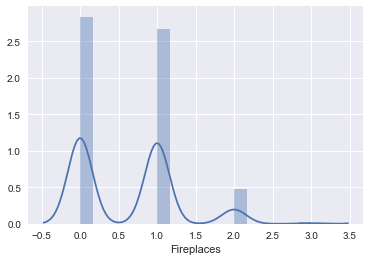

In [89]:
sns.distplot(df['Fireplaces']);

**Comments**
1. Complete data 
2. Too few observations for 3 fireplaces
3. Create new categories as Fireplace and NoFireplace
4. For new data when testing, impute missing as NoFireplace

### 17. FireplaceQu

In [90]:
df['FireplaceQu'].head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [91]:
df['FireplaceQu'].count()

770

In [92]:
round(100*df['FireplaceQu'].count()/m,1)

52.7

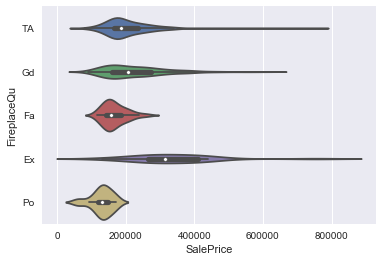

In [93]:
sns.violinplot(x="SalePrice", y="FireplaceQu", data=df);

In [94]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count()

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
Name: FireplaceQu, dtype: int64

In [95]:
round(100*df.groupby(['FireplaceQu'])['FireplaceQu'].count()/m,1)

FireplaceQu
Ex     1.6
Fa     2.3
Gd    26.0
Po     1.4
TA    21.4
Name: FireplaceQu, dtype: float64

In [99]:
df[df['Fireplaces']==0]['Fireplaces'].count()

690

In [104]:
round(100*df[df['Fireplaces']==0]['Fireplaces'].count()/m,1)

47.3

In [102]:
df[df['FireplaceQu'].isnull()]['Fireplaces'].count()

690

**Comments**
1. Complete data but many NaN's
2. Create 3 new categories: Gd+Ex, Others, Missing

### 18. GarageType

In [156]:
df['GarageType'].head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

In [157]:
df['GarageType'].count()

1379

In [160]:
round(100*df['GarageType'].count()/m,1)

94.5

In [158]:
df.groupby(['GarageType'])['GarageType'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: GarageType, dtype: int64

In [159]:
round(100*df.groupby(['GarageType'])['GarageType'].count()/m,1)

GarageType
2Types      0.4
Attchd     59.6
Basment     1.3
BuiltIn     6.0
CarPort     0.6
Detchd     26.5
Name: GarageType, dtype: float64

**Comments**
1. 5.5% missing data
2. One option is create new category: Attached vs Other (including missing) OR Attached, Detached, and Other

### 19. GarageYrBlt

In [165]:
df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [162]:
df['GarageYrBlt'].count()

1379

In [166]:
round(100*df['GarageYrBlt'].count()/m,1)

94.5

In [169]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

**Comments**
1. 5.5% missing data (same as GarageType)
2. Check if same as year house was built

### 20. GarageFinish

In [170]:
df['GarageFinish'].head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

In [171]:
df['GarageFinish'].count()

1379

In [172]:
df.groupby(['GarageFinish'])['GarageFinish'].count()

GarageFinish
Fin    352
RFn    422
Unf    605
Name: GarageFinish, dtype: int64

In [173]:
round(100*df.groupby(['GarageFinish'])['GarageFinish'].count()/m,1)

GarageFinish
Fin    24.1
RFn    28.9
Unf    41.4
Name: GarageFinish, dtype: float64

**Comments**
1. 5.5% missing data (same as previous...)
2. Include missing values in Unf

In [1]:
df['HouseStyle']

NameError: name 'df' is not defined

# ALL VARIABLES TABLES

## a. Continuous

In [10]:
pd.set_option('display.precision', 1)
print(df.describe(percentiles = [.5]).T)

                count     mean      std      min       50%       max
Id             1460.0  7.3e+02    421.6      1.0     730.5    1460.0
MSSubClass     1460.0  5.7e+01     42.3     20.0      50.0     190.0
LotFrontage    1201.0  7.0e+01     24.3     21.0      69.0     313.0
LotArea        1460.0  1.1e+04   9981.3   1300.0    9478.5  215245.0
OverallQual    1460.0  6.1e+00      1.4      1.0       6.0      10.0
OverallCond    1460.0  5.6e+00      1.1      1.0       5.0       9.0
YearBuilt      1460.0  2.0e+03     30.2   1872.0    1973.0    2010.0
YearRemodAdd   1460.0  2.0e+03     20.6   1950.0    1994.0    2010.0
MasVnrArea     1452.0  1.0e+02    181.1      0.0       0.0    1600.0
BsmtFinSF1     1460.0  4.4e+02    456.1      0.0     383.5    5644.0
BsmtFinSF2     1460.0  4.7e+01    161.3      0.0       0.0    1474.0
BsmtUnfSF      1460.0  5.7e+02    441.9      0.0     477.5    2336.0
TotalBsmtSF    1460.0  1.1e+03    438.7      0.0     991.5    6110.0
1stFlrSF       1460.0  1.2e+03    

### b. Non-numerical

In [11]:
cat = []
for c in list(df.columns):
    if c not in list(df.describe().columns):
        cat.append(c)
print(cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
for c in cat:
    print(100*df[c].value_counts()/m)
    print("-----------------------------")

RL         78.8
RM         14.9
FV          4.5
RH          1.1
C (all)     0.7
Name: MSZoning, dtype: float64
-----------------------------
Pave    99.6
Grvl     0.4
Name: Street, dtype: float64
-----------------------------
Grvl    3.4
Pave    2.8
Name: Alley, dtype: float64
-----------------------------
Reg    63.4
IR1    33.2
IR2     2.8
IR3     0.7
Name: LotShape, dtype: float64
-----------------------------
Lvl    89.8
Bnk     4.3
HLS     3.4
Low     2.5
Name: LandContour, dtype: float64
-----------------------------
AllPub    1.0e+02
NoSeWa    6.8e-02
Name: Utilities, dtype: float64
-----------------------------
Inside     72.1
Corner     18.0
CulDSac     6.4
FR2         3.2
FR3         0.3
Name: LotConfig, dtype: float64
-----------------------------
Gtl    94.7
Mod     4.5
Sev     0.9
Name: LandSlope, dtype: float64
-----------------------------
NAmes      15.4
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAme